# Lecture 16: Linear Regression by Gradient Descent

Today let us learn to minimize the loss function in the linear regression using gradient descent.

Today we will import the wine quality data from [UCI machine learning dataset repo on Kaggle](https://www.kaggle.com/uciml/datasets) like we did in last lecture.

* Download `winequality-red.csv` from [https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/), unzip it and put it in the same directory with this notebook.
* Check the csv file using Excel on the lab computer. Be careful with the delimiters, Kaggle's csv is using `,` comma as delimiter. Import the data using the following command.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# this will help us plot things nicely
def plot_data_and_line(weight, bias, X, Y):
    # this function plots data against our model
    # weight and bias are our regression model's parameters
    # Conventionally X are our training data, Y are the labels 
    plot_max, plot_min = max(X), min(X)
    XX = np.linspace(plot_min,plot_max,200)
    YY = weight*XX + bias

    plt.scatter(X, Y, alpha=0.1)
    plt.plot(XX, YY, color='red',linewidth = 4, alpha=0.4)
    plt.show()

In [4]:
wine_data = np.loadtxt('winequality-red.csv', delimiter=',', 
                       skiprows=1, usecols = [0,1,2])
fix_acid = wine_data[:,0]
vol_acid = wine_data[:,1]
ctr_acid = wine_data[:,2]

# some pre-processing by normalizing the data to have zero mean
fix_acid = fix_acid - np.mean(fix_acid)
vol_acid = vol_acid - np.mean(vol_acid)
ctr_acid = ctr_acid - np.mean(ctr_acid)

Recall the Loss function we want to minimize: 
$$L(w,b) = \frac{1}{N}\sum_{i=1}^{N} \Big((w x_i + b) - y_i\Big)^2,$$
the $1/N$ factor is added so that statistically we are trying to minimize an expected value (sample mean) from an empirical distribution.
Here we want to investigate the relation of citric acid as $x_i$ with the fixed acidity as $y_i$. We want to form a linear function $f(x_i; w, b) = w x_i + b$ using citric acid as input, $w,b$ as parameter, to as close to $y_i$ (actual data) as possible.

In [8]:
x = ctr_acid
y = fix_acid
N = len(x)

# our model
def f(w, b):
    # x is the data, which is globally assigned in the memory
    return w * x + b

# loss function = total square error on the whole data set
def loss(w, b):
    # x,y globally assigned outside this function for simplicity
    error = f(w,b) - y
#     return (1/N)*np.sum(error**2)
    return np.mean(error**2)

In [6]:
x.shape

(1599,)

In [7]:
(5.4*x + 0.4).shape

(1599,)

In [9]:
# numerical partial derivatives from Lecture 14
def numpartialx(f):
    h = 0.0000001 
    return (lambda x, y: (f(x+h, y)-f(x, y))/h)

def numpartialy(f):
    h = 0.0000001 
    return (lambda x, y: (f(x, y+h)-f(x, y))/h)

In [10]:
# a better way: central difference
def numpartialx(f):
    h = 0.0000001 
    return (lambda x, y: (f(x+h, y)-f(x-h, y))/(2*h))

def numpartialy(f):
    h = 0.0000001 
    return (lambda x, y: (f(x, y+h)-f(x, y-h))/(2*h))

## Gradient descent routine copied from Lecture 14

> Choose initial guess $(w_0,b_0)$ and step size (learning rate) $\eta$<br><br>
>    For $k=0,1,2, \cdots, M$<br><br>
>     &nbsp;&nbsp;&nbsp;&nbsp;   $(w_{k+1},b_{k+1}) =  (w_k,b_k) - \eta\nabla L(w_k,b_k) $

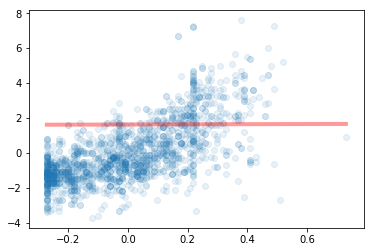

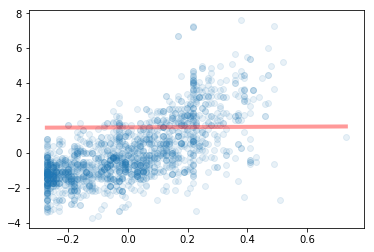

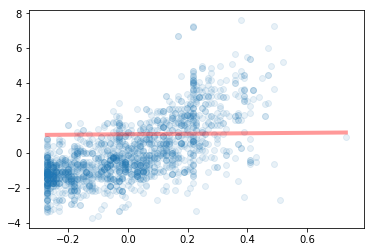

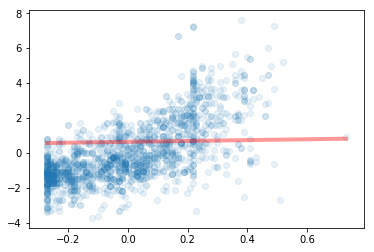

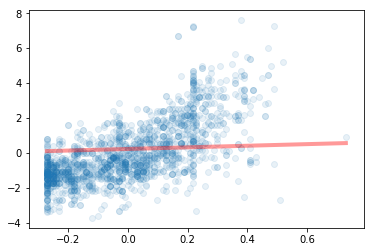

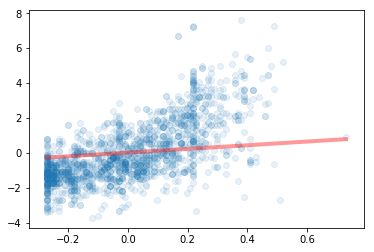

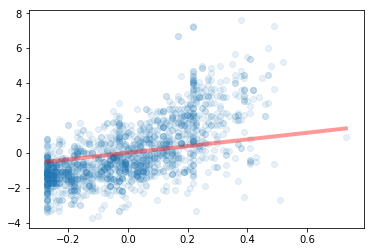

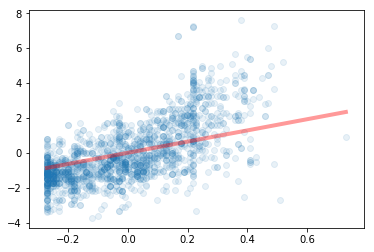

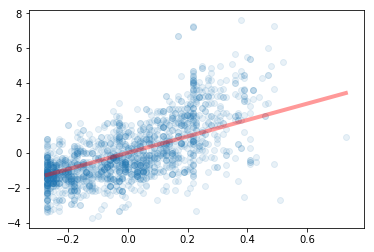

final loss after 600 iterations is:  1.6769522717267638


In [33]:
eta = 0.05  # step size (learning rate)
num_steps = 600

# initial guess
w = 0.0
b = 2.0
loss_at_eachstep = np.zeros(num_steps) # record the change of the loss function
for i in range(num_steps):
    loss_at_eachstep[i] = loss(w,b)
    dw, db = numpartialx(loss)(w,b), numpartialy(loss)(w,b)
    w = w - eta * dw
    b = b - eta * db
    if i in (1, 2, 5, 10, 20, 50, 100, 200, 400):
        plot_data_and_line(w, b, x, y)

print("final loss after", num_steps, "iterations is: ", loss(w,b))

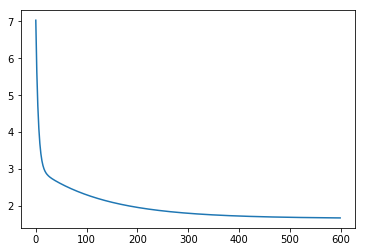

In [34]:
plt.plot(range(num_steps), loss_at_eachstep)
plt.show()

# In-class exercise
* Try the same procedure by letting `x = vol_acid` and `y = fix_acid`.
* Try varying the step size (learning rate) $\eta$ from 1, 1e-1, 1e-2, to 1e-3. What have you observed?
* A regularization can be added to the loss function to make the converging process smoother: we can choose a smaller $\epsilon \ll 1$ such that our loss is "regularized" by the squared (sum) of the weight(s) (bias not included)
$$L(w,b) = \frac{1}{N}\sum_{i=1}^{N} \Big((w x_i + b) - y_i\Big)^2 + \epsilon w^2$$
Try this with $\epsilon = 10^{-3}$,
(Reading: this is called [Ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)).



In [43]:
eps = 1e-1
def f(w, b):
    # x is the data, which is globally assigned in the memory
    return w * x + b

# loss function = total square error on the whole data set
def loss(w, b):
    # x,y globally assigned outside this function for simplicity
    error = f(w,b) - y
#     return (1/N)*np.sum(error**2)
    return np.mean(error**2) + eps*w**2

def gradient_loss(w,b):
    dw = 2*np.mean((f(w,b)- y)*x) + 2*eps*w
    db = 2*np.mean(f(w,b) - y)
    return dw, db

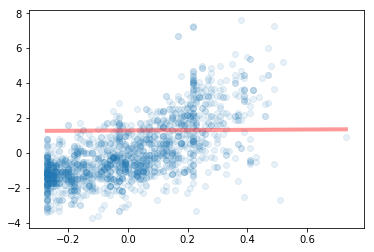

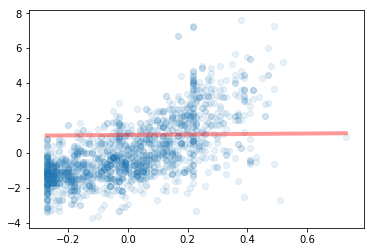

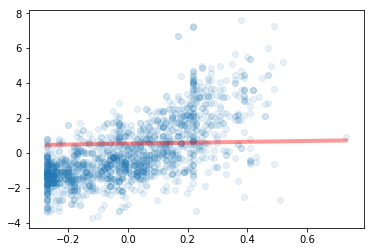

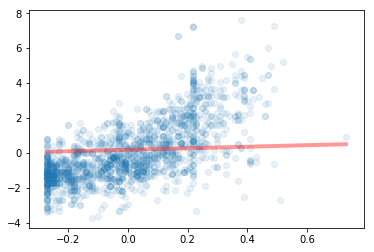

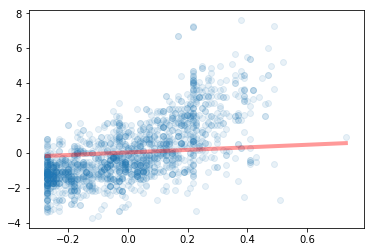

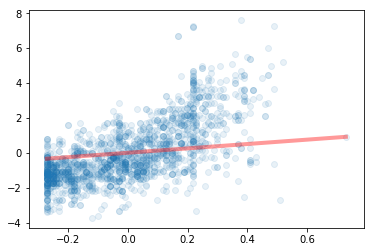

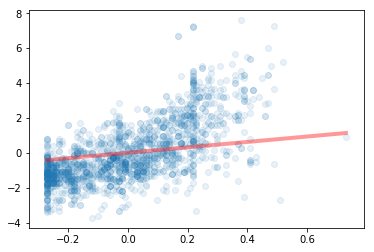

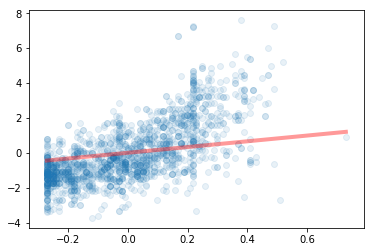

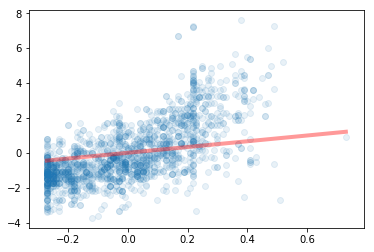

final loss after 600 iterations is:  2.653682064407318


In [47]:
eta = 1e-1# step size (learning rate)
num_steps = 600

# initial guess
w = 0.0
b = 2.0
ridge_loss_at_eachstep = np.zeros(num_steps) # record the change of the loss function
for i in range(num_steps):
    ridge_loss_at_eachstep[i] = loss(w,b)
#     dw, db = numpartialx(loss)(w,b), numpartialy(loss)(w,b)
    dw, db = gradient_loss(w,b)
    w = w - eta * dw
    b = b - eta * db
    if i in (1, 2, 5, 10, 20, 50, 100, 200, 400):
        plot_data_and_line(w, b, x, y)

print("final loss after", num_steps, "iterations is: ", loss(w,b))

In [48]:
w # w is smaller than the un-regularized one

1.6507491534332774

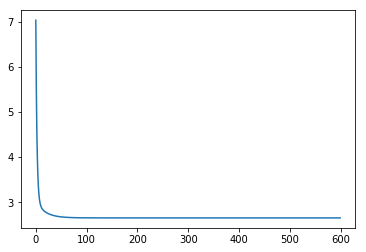

In [49]:
plt.plot(range(num_steps), ridge_loss_at_eachstep)
plt.show()